You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

The ﬁrst page is the home page. When you come to the site for the ﬁrst time, you can only land on the home page as a ﬁrst page.
From the home page, the user can perform a search and land on the search page.
From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.
If she does decide to buy, she ends up on the conﬁrmation page
The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# load data from csv file 

In [10]:
user_info = pd.read_csv('user_table.csv',index_col='user_id')
home_page = pd.read_csv('home_page_table.csv',index_col='user_id')
search_page = pd.read_csv('search_page_table.csv',index_col='user_id')
pay_page = pd.read_csv('payment_page_table.csv',index_col='user_id')
confirm_page = pd.read_csv('payment_confirmation_table.csv',index_col='user_id')

# Generate user landing info

In [54]:
user_page = pd.merge(home_page,user_info,left_index=True,right_index=True)
user_page.loc[search_page.index,'page'] = search_page['page']
user_page.loc[pay_page.index,'page'] = pay_page['page']
user_page.loc[confirm_page.index,'page'] = confirm_page['page']
user_page.rename(columns={'page':'final_page'},inplace=True)
user_page.head()

,final_page,date,device,sex
user_id,,,,
313593,home_page,2015-02-26,Desktop,Female
468315,home_page,2015-02-21,Desktop,Male
264005,home_page,2015-03-25,Desktop,Female
290784,home_page,2015-03-14,Desktop,Male
639104,search_page,2015-01-03,Desktop,Female


# How retained rate changes during landing on four different pages

In [51]:
conversion_table = pd.DataFrame(user_page.value_counts(['final_page']))
conversion_table.rename(columns={0:'retained_user'},inplace=True)
conversion_table['drop_users'] = conversion_table.iloc[0]['retained_user']-conversion_table['retained_user']
conversion_table['retained_rate'] = conversion_table['retained_user']/conversion_table.iloc[0]['retained_user']
conversion_table['drop_rate'] = conversion_table['drop_users']/conversion_table.iloc[0]['retained_user']
conversion_table

,retained_user,drop_users,retianed_rate,drop_rate
final_page,,,,
home_page,45200,0,1.000000,0.000000
search_page,39170,6030,0.866593,0.133407
payment_page,5578,39622,0.123407,0.876593
payment_confirmation_page,452,44748,0.010000,0.990000


# How date affect users retained rates

In [92]:
from datetime import datetime
datetime.strptime(user_page.iloc[0]['date'],'%Y-%m-%d').weekday()
user_page['weekday'] = user_page['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').weekday())

monday_data = pd.DataFrame(user_page[user_page['weekday']==0].value_counts(['final_page']))
monday_data.rename(columns={0:'monday'},inplace=True)

tuesday_data = pd.DataFrame(user_page[user_page['weekday']==1].value_counts(['final_page']))
tuesday_data.rename(columns={0:'tuesday'},inplace=True)

wednesday_data = pd.DataFrame(user_page[user_page['weekday']==2].value_counts(['final_page']))
wednesday_data.rename(columns={0:'wednesday'},inplace=True)

thurday_data = pd.DataFrame(user_page[user_page['weekday']==3].value_counts(['final_page']))
thurday_data.rename(columns={0:'thurday'},inplace=True)

friday_data = pd.DataFrame(user_page[user_page['weekday']==4].value_counts(['final_page']))
friday_data.rename(columns={0:'friday'},inplace=True)

saturday_data = pd.DataFrame(user_page[user_page['weekday']==5].value_counts(['final_page']))
saturday_data.rename(columns={0:'saturday'},inplace=True)

sunday_data = pd.DataFrame(user_page[user_page['weekday']==6].value_counts(['final_page']))
sunday_data.rename(columns={0:'sunday'},inplace=True)

date_factor = pd.concat([monday_data,tuesday_data,wednesday_data,thurday_data,friday_data,saturday_data,sunday_data],axis=1)
date_factor

,monday,tuesday,wednesday,thurday,friday,saturday,sunday
final_page,,,,,,,
home_page,6472,6445,6496,6727,6344,6256,6460
search_page,5614,5399,5497,5818,5535,5700,5607
payment_page,792,784,784,833,817,775,793
payment_confirmation_page,77,69,54,66,54,70,62


# How device affect users retained rates

In [84]:
mobile_data = pd.DataFrame(user_page[user_page['device']=='Mobile'].value_counts(['final_page']))
mobile_data.rename(columns={0:'mobile'},inplace=True)

desktop_data = pd.DataFrame(user_page[user_page['device']=='Desktop'].value_counts(['final_page']))
desktop_data.rename(columns={0:'desktop'},inplace=True)

device_factor = pd.concat([mobile_data,desktop_data],axis=1)
device_factor

,mobile,desktop
final_page,,
home_page,15100,30100
search_page,12080,27090
payment_page,2718,2860
payment_confirmation_page,302,150


# How sex affect users retained rates

In [85]:
male_data = pd.DataFrame(user_page[user_page['sex']=='Male'].value_counts(['final_page']))
male_data.rename(columns={0:'male_data'},inplace=True)

female_data = pd.DataFrame(user_page[user_page['sex']=='Female'].value_counts(['final_page']))
female_data.rename(columns={0:'female_data'},inplace=True)

sex_factor = pd.concat([male_data,female_data],axis=1)
sex_factor

,male_data,female_data
final_page,,
home_page,22801,22399
search_page,19594,19576
payment_page,2719,2859
payment_confirmation_page,211,241


# Using chi test to discuss how above factors affect user retained rates

In [132]:
user_chi = user_page.copy()
user_chi['final_page'] = (user_chi['final_page']=='payment_confirmation_page').astype(int)
user_chi['device'] = (user_chi['device'] == 'Mobile').astype(int)
user_chi['sex'] = (user_chi['sex'] == 'Male').astype(int)
user_chi.rename(columns={'final_page':'is_confirmed','device':'from_mobile','sex':'is_male'},inplace=True)
user_chi['at_monday'] = (user_chi['weekday'] == 0).astype(int)
user_chi['at_tuesday'] = (user_chi['weekday'] == 1).astype(int)
user_chi['at_wednesday'] = (user_chi['weekday'] == 2).astype(int)
user_chi['at_thurday'] = (user_chi['weekday'] == 3).astype(int)
user_chi['at_friday'] = (user_chi['weekday'] == 4).astype(int)
user_chi['at_saturday'] = (user_chi['weekday'] == 5).astype(int)
user_chi['at_sunday'] = (user_chi['weekday'] == 6).astype(int)
user_chi.drop(['date','weekday'],axis=1,inplace=True)
user_chi.head()

,is_confirmed,from_mobile,is_male,at_monday,at_tuesday,at_wednesday,at_thurday,at_friday,at_saturday,at_sunday
user_id,,,,,,,,,,
313593,0,0,0,0,0,0,1,0,0,0
468315,0,0,1,0,0,0,0,0,1,0
264005,0,0,0,0,0,1,0,0,0,0
290784,0,0,1,0,0,0,0,0,1,0
639104,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
456851,0,1,1,1,0,0,0,0,0,0
128619,0,0,1,0,0,0,1,0,0,0
167290,0,0,0,0,0,0,0,0,0,1


In [154]:
from sklearn.feature_selection import chi2
y = user_chi['is_confirmed']
X = user_chi.drop('is_confirmed',axis=1)
scores, pvalues = chi2(X,y)
res1 = pd.DataFrame(data=scores,index=['from_mobile','is_male','at_monday','at_tuesday','at_wednesday','at_thurday','at_friday','at_saturday','at_sunday'])
res2 = pd.DataFrame(data=pvalues,index=['from_mobile','is_male','at_monday','at_tuesday','at_wednesday','at_thurday','at_friday','at_saturday','at_sunday'])
res = pd.merge(left=res1,right=res2,left_index=True,right_index=True)
res.rename(columns={'0_x':'scores','0_y':'pvalues'},inplace=True)
res.sort_values(by=['scores','pvalues'],axis=0,inplace=True,ascending=False)

,scores,pvalues
from_mobile,151.758794,7.153913e-35
at_monday,2.318821,1.278169e-01
at_wednesday,1.615497,2.037208e-01
at_friday,1.498670,2.208761e-01
is_male,1.082703,2.980938e-01
at_saturday,0.564341,4.525166e-01
at_tuesday,0.481501,4.877434e-01
at_sunday,0.105964,7.447867e-01
at_thurday,0.022253,8.814147e-01


# Answer question 1
A full picture of funnel conversion rate for both desktop and mobile
The number of users landing on pages by mobile is almost half of users by desktop.
However the number of these mobile users eventually land on confirm pages is twice of other users. 

<AxesSubplot:xlabel='final_page'>

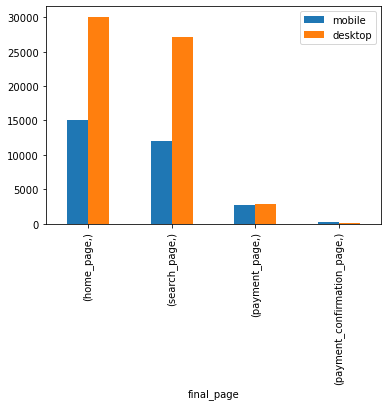

In [157]:
device_factor.plot.bar()

# Answer question 2
question:
Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve?
answer:
Landing from mobile achieve 151 score, which correlated the retained rate with device, and its pvalue was below 0.001, which has statistical significance.
In conclude, encourage more users to land on pages from mobile, which actually increase retained rates.